## EDA of Historical Data Stored on BigQuery

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery
from google.cloud.bigquery_storage import BigQueryReadClient
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install --upgrade 'google-cloud-bigquery[all]'

In [3]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "aesthetic-nova-454803-r7-94e7eb0af61c.json"

In [4]:
# Initialize clients
bq_client = bigquery.Client()
bq_storage_client = BigQueryReadClient()

# Define the query to fetch data
# Our focus is on English language videos from the US
# We are using the BigQuery Storage API for faster data retrieval
query = """
    SELECT *
    FROM `aesthetic-nova-454803-r7.youtube_trending_dataset.US_trending_videos_transformed`
"""

# Use the storage API 
data = bq_client.query(query).to_dataframe(bqstorage_client=bq_storage_client)

In [5]:
data

,video_id,title,channelId,channelTitle,categoryId,tags,comments_disabled,ratings_disabled,description,likes_start,likes_end,view_count_start,view_count_end,comment_count_start,comment_count_end,trendingDuration,hoursToReachTrending,published_dayOfWeek,published_year,published_month,tagCount,engagement_rate,like_view_ratio,popularity_score,popularity_class
0,vwSXOPq9u80,"Happy Birthday, #TeamTrees!",UCTzBfQF4z2ZdXRbfWazLlrQ,#TeamTrees,Nonprofits & Activism,team trees|teamtrees|#teamtrees|happy birthday...,False,False,One. Year. Ago. #TeamTrees took over the inter...,26465,56071,295967,809044,2287,3770,5,9.7,Sunday,2020,10,6,0.004660,0.069305,261.280808,2
1,EBwp3oUN-qM,"Hurricane Eta rapidly intensifies, now a major...",UCMYlXK0jyerVnc3dmz-vjCA,10 Tampa Bay,News & Politics,hurricane|tropics|weather,False,False,5:30 p.m. Nov. 2: The storm is forecast to re-...,696,843,301191,355723,231,302,8,25.4,Monday,2020,11,3,0.000849,0.002370,0.715686,1
2,SIjAQdMKCvI,2HYPE VS 100 THIEVES HOUSE PARTY OLYMPICS!,UCnrX2_FoKieobtw19PiphDw,100 Thieves,Gaming,nadeshot|100 thieves|pro gamer|100T|valkyrae|1...,False,False,"100 Thieves' content creators Nadeshot, CouRag...",28110,32201,402740,517898,2422,2644,3,29.5,Thursday,2020,10,33,0.005105,0.062176,164.394232,2
3,gtZv_7tkYNc,HOW 2HYPE JOINED 100 THIEVES!,UCnrX2_FoKieobtw19PiphDw,100 Thieves,Gaming,100 thieves|2hype|100t nadeshot|nadeshot|100t ...,False,False,Watch Part 1 of this announcement here: https:...,45818,59175,553415,984942,4201,4951,6,5.9,Tuesday,2020,11,25,0.005027,0.060080,297.454495,2
4,xTuRUdjgzsw,GUESS WHICH ITEM IS CAKE CHALLENGE ft. CouRage...,UCnrX2_FoKieobtw19PiphDw,100 Thieves,Gaming,nadeshot|100 thieves|pro gamer|100T|call of du...,False,False,Can the 100 Thieves' content creators tell the...,20233,34931,276204,605233,370,609,5,5.9,Monday,2020,9,29,0.001006,0.057715,35.148412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47137,rZTByFFlAqk,임신테스트기와 함께 눈물바다가 되었던 날,UC47HAkQ6oZ-Hf5SVBGdvP6g,국가비 GabieKook,People & Blogs,[None],False,False,오랜 기다림 끝에 드디어 임신 테스트기를 하게되는데…,57242,98592,566097,1198223,6895,10037,5,10.5,Thursday,2024,2,1,0.008377,0.082282,825.862885,3
47138,q9J0Ieu1xU8,"트와이스(TWICE)의 킬링보이스를 라이브로!ㅣOOH-AHH하게, CHEER UP,...",UCtCiO5t2voB14CmZKTkIzPQ,딩고 뮤직 / dingo music,Music,딩고뮤직|dingo|dingomusic|music|kpop|live|멜론|세로라이브...,False,False,둘 중에 하나만 골라 트와이스 킬보 or 킬링보이스 😙🧡0:00 입장0:33 OOH...,282326,573655,2656369,9513909,21241,34944,8,14.0,Tuesday,2024,3,14,0.003673,0.060296,2106.999375,3
47139,JleoAppaxi0,IU 'Love wins all' MV,UC3SyT4_WLHzN7JmHQwKQZww,이지금 [IU Official],Entertainment,IU|아이유|이담|EDAM|이지금|dlwlrma|선공개|Pre-Release|Sin...,False,False,IU Pre-Release Single 'Love wins all'➫ 2024.01...,2205299,3914371,11773678,37100761,139554,188151,8,9.0,Tuesday,2024,1,21,0.005071,0.105506,19851.151248,3
47140,bANn_L22zE8,IU 'Love wins all' MV Trailer,UC3SyT4_WLHzN7JmHQwKQZww,이지금 [IU Official],Entertainment,IU|아이유|이담|EDAM|이지금|dlwlrma|MV|뮤직비디오|MV Trailer...,False,False,IU Pre-Release Single 'Love wins all'MV ➫ 2024...,176175,315723,1010272,2554829,7552,8910,6,9.0,Monday,2024,1,27,0.003488,0.123579,1101.088147,3


In [6]:
data.describe()

,likes_start,likes_end,view_count_start,view_count_end,comment_count_start,comment_count_end,trendingDuration,hoursToReachTrending,published_year,published_month,tagCount,engagement_rate,like_view_ratio,popularity_score,popularity_class
count,47142.0,47142.0,47142.0,47142.0,47142.0,47142.0,47142.0,47142.000000,47142.0,47142.0,47142.0,47129.000000,47131.000000,47127.000000,47142.0
mean,77302.79689,119479.708667,1244531.299648,2669533.824615,6354.205061,8994.07575,4.770714,21.461134,2021.882165,6.647088,16.16603,0.003673,0.047366,595.285386,1.997136
std,220383.211629,365096.17564,2881945.045641,9624392.274298,37333.664259,67410.202474,1.994438,19.362248,1.10306,3.526514,12.548114,0.004245,0.033101,4948.984523,0.712369
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.000000,2020.0,1.0,1.0,0.000000,0.000000,0.000000,0.0
25%,13129.25,18340.0,313158.5,538860.25,978.0,1300.25,4.0,9.000000,2021.0,3.0,5.0,0.001463,0.023005,36.473405,1.0
50%,27912.5,41724.5,570583.0,1066956.5,2077.0,2759.5,5.0,21.600000,2022.0,7.0,15.0,0.002639,0.042314,108.663116,2.0
75%,65363.75,101793.75,1194770.75,2324437.25,4642.0,6206.0,6.0,28.200000,2023.0,10.0,25.0,0.004529,0.063161,312.640940,2.0
max,7114337.0,16021534.0,91463891.0,1407643634.0,3400291.0,6738537.0,36.0,699.700000,2024.0,12.0,78.0,0.164209,0.328782,410229.756932,3.0


### Correlation plot between numerical variables

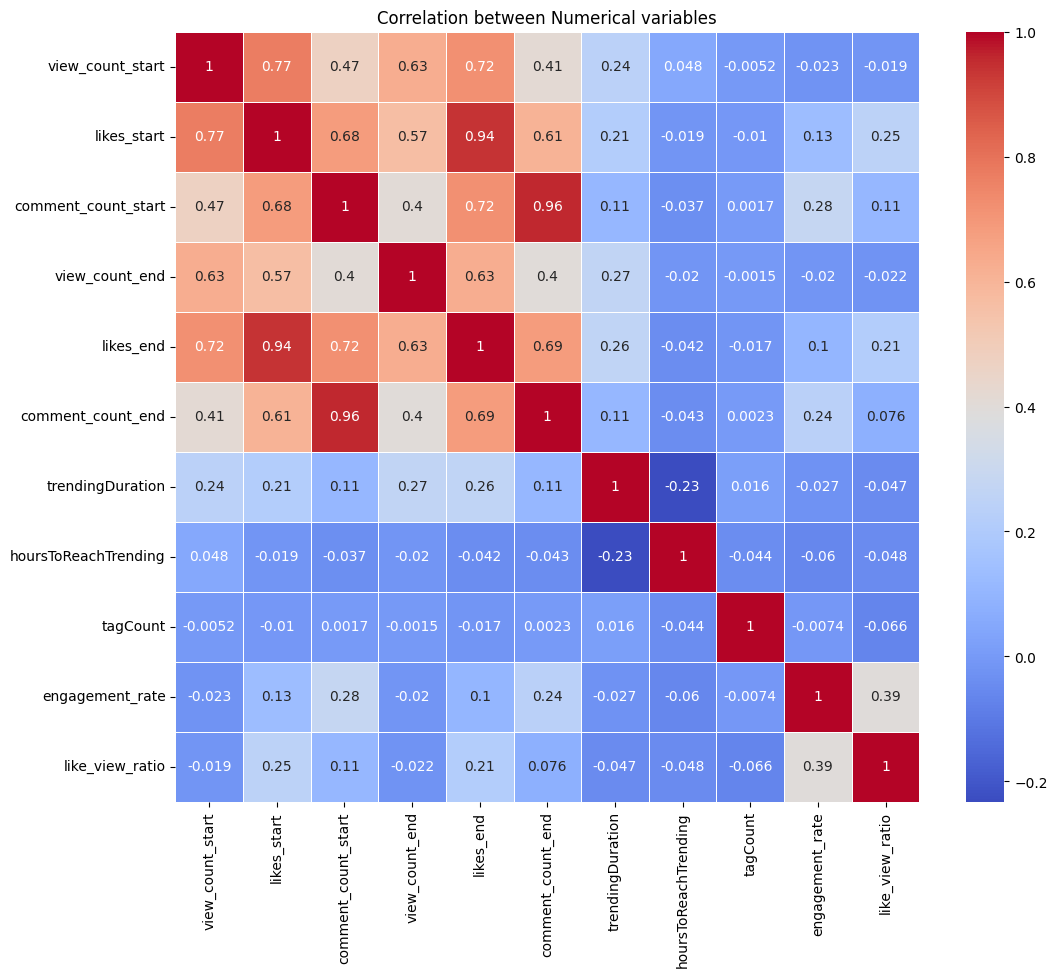

In [9]:
plt.figure(figsize = (12, 10))
sns.heatmap(data[['view_count_start', 'likes_start', 'comment_count_start', 'view_count_end', 'likes_end', 'comment_count_end', 'trendingDuration', 'hoursToReachTrending', 'tagCount', 'engagement_rate', 'like_view_ratio']].corr(), linewidths=.5, annot=True, cmap='coolwarm')
plt.title("Correlation between Numerical variables")
plt.show()

### Top 10 Channels containing most number of trending videos

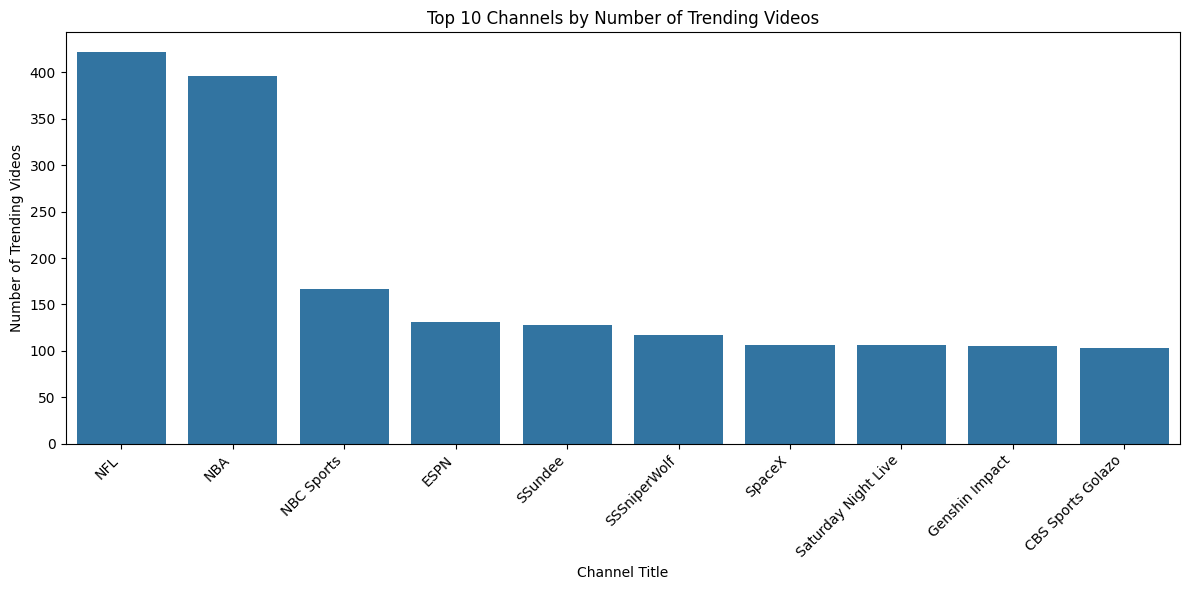

In [12]:
plt.figure(figsize=(12, 6))
channel_counts = data['channelTitle'].value_counts().head(10)
sns.barplot(x=channel_counts.index, y=channel_counts.values)
plt.title('Top 10 Channels by Number of Trending Videos')
plt.xlabel('Channel Title')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Number of trending videos by categories

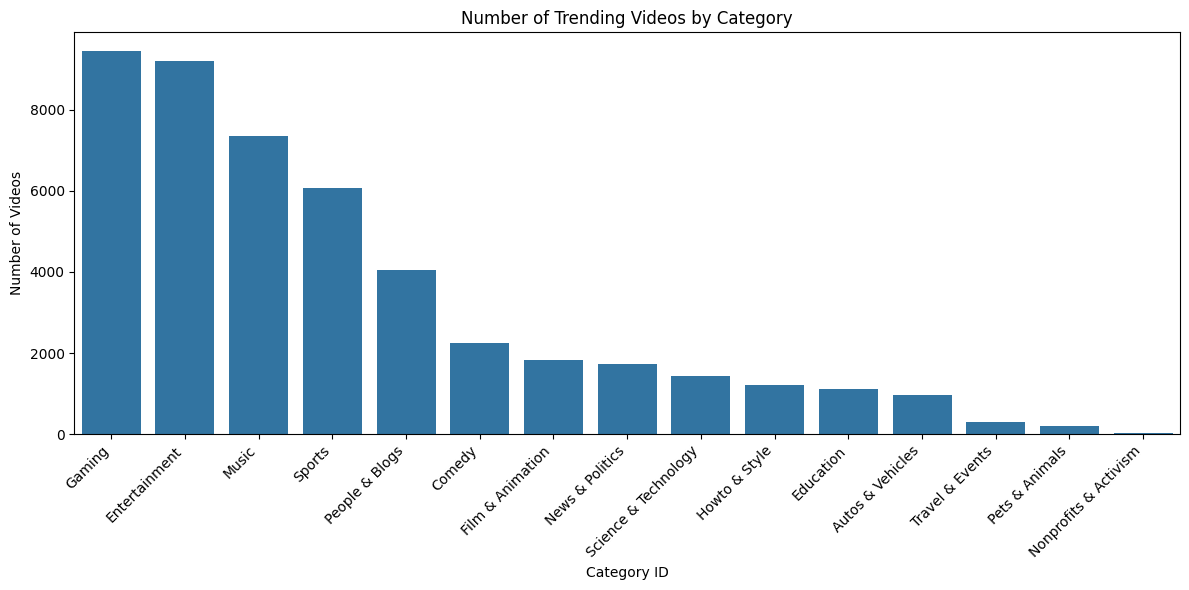

In [13]:
plt.figure(figsize=(12, 6))
category_counts = data['categoryId'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Trending Videos by Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average time taken (hours) for video to trend by category

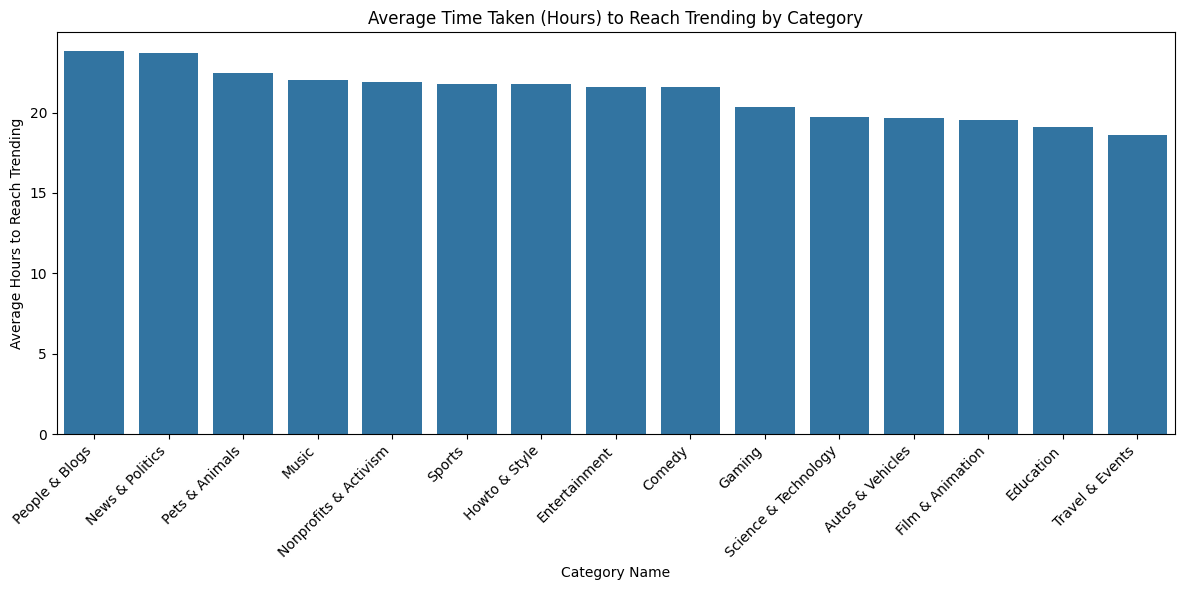

In [16]:
plt.figure(figsize=(12, 6))
avg_hours_by_category = data.groupby('categoryId')['hoursToReachTrending'].mean().sort_values(ascending=False)
sns.barplot(x=avg_hours_by_category.index, y=avg_hours_by_category.values)
plt.title('Average Time Taken (Hours) to Reach Trending by Category')
plt.xlabel('Category Name')
plt.ylabel('Average Hours to Reach Trending')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Average trending duration (days) by category

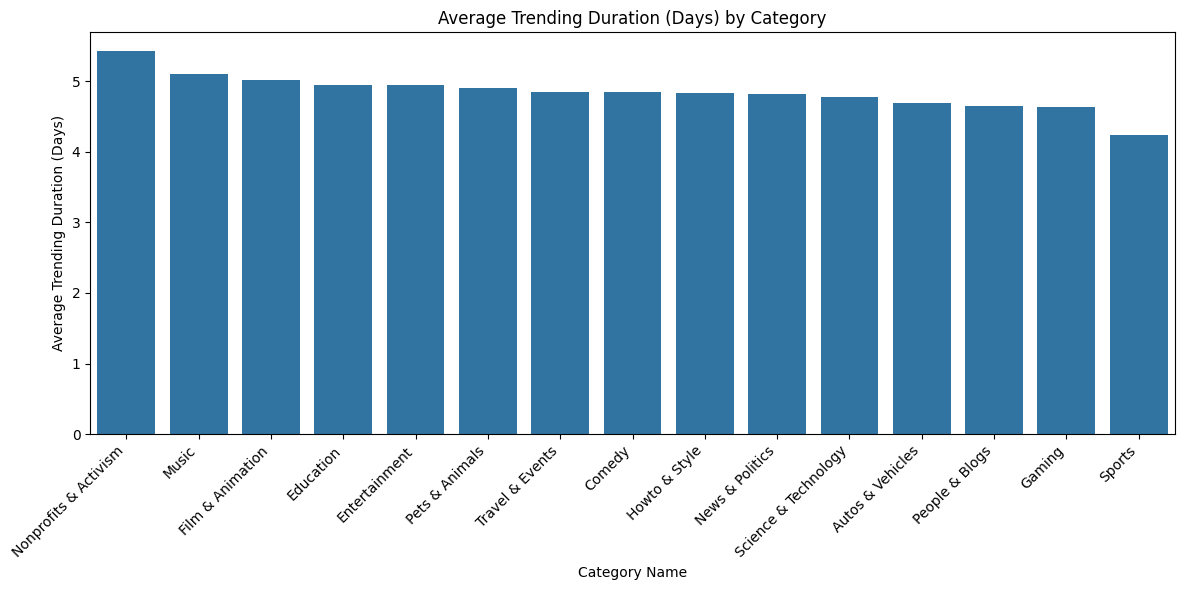

In [17]:
plt.figure(figsize=(12, 6))
avg_trending_duration_by_category = data.groupby('categoryId')['trendingDuration'].mean().sort_values(ascending=False)
sns.barplot(x=avg_trending_duration_by_category.index, y=avg_trending_duration_by_category.values)
plt.title('Average Trending Duration (Days) by Category')
plt.xlabel('Category Name')
plt.ylabel('Average Trending Duration (Days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

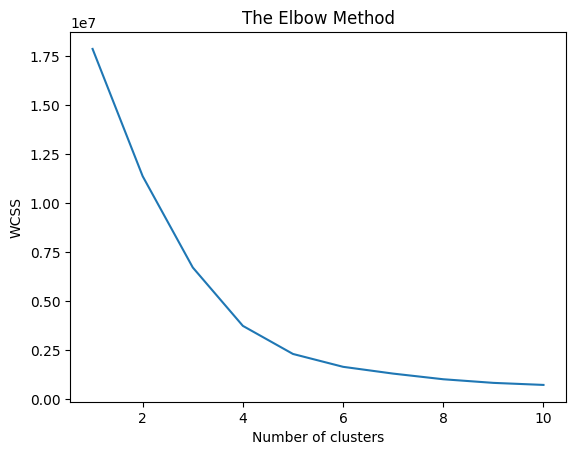

In [18]:
# find optimal clusters for KModes
X = data[['hoursToReachTrending', 'trendingDuration']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


We can see that the optimal number of clusters to be used is 4.

      video_id                                              title  \
0  vwSXOPq9u80                        Happy Birthday, #TeamTrees!   
1  EBwp3oUN-qM  Hurricane Eta rapidly intensifies, now a major...   
2  SIjAQdMKCvI         2HYPE VS 100 THIEVES HOUSE PARTY OLYMPICS!   
3  gtZv_7tkYNc                      HOW 2HYPE JOINED 100 THIEVES!   
4  xTuRUdjgzsw  GUESS WHICH ITEM IS CAKE CHALLENGE ft. CouRage...   

                  channelId  channelTitle             categoryId  \
0  UCTzBfQF4z2ZdXRbfWazLlrQ    #TeamTrees  Nonprofits & Activism   
1  UCMYlXK0jyerVnc3dmz-vjCA  10 Tampa Bay        News & Politics   
2  UCnrX2_FoKieobtw19PiphDw   100 Thieves                 Gaming   
3  UCnrX2_FoKieobtw19PiphDw   100 Thieves                 Gaming   
4  UCnrX2_FoKieobtw19PiphDw   100 Thieves                 Gaming   

                                                tags  comments_disabled  \
0  team trees|teamtrees|#teamtrees|happy birthday...              False   
1                         

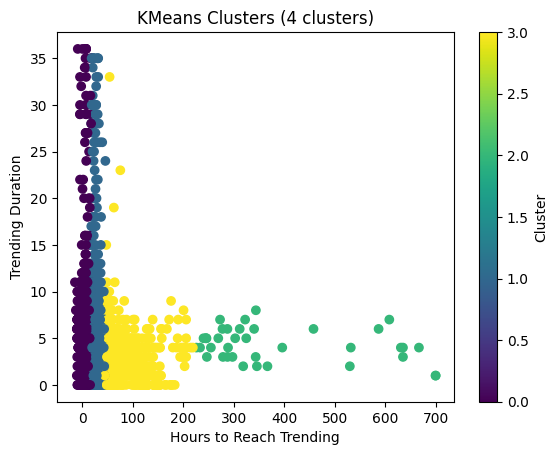

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=42)
data['trend_cluster'] = kmeans.fit_predict(X)

# Step 2: Show the result
# Now, the 'data' DataFrame will have a new column 'cluster' that contains the cluster label for each video
print(data.head())

# Optional: Visualize the clusters
plt.scatter(data['hoursToReachTrending'], data['trendingDuration'], c=data['trend_cluster'], cmap='viridis')
plt.title('KMeans Clusters (4 clusters)')
plt.xlabel('Hours to Reach Trending')
plt.ylabel('Trending Duration')
plt.colorbar(label='Cluster')
plt.show()

### Split train,test for ML

In [21]:
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)
train_dataset.reset_index(inplace=True, drop=True)
test_dataset.reset_index(inplace=True, drop=True)

In [22]:
train_dataset.to_parquet("train_dataset.parquet", index=False)
test_dataset.to_parquet("test_dataset.parquet", index=False)